The taste preferences in regards to vinho verde is analyzed and modeled based on analytical data.
A workflow that performs data handling and a PCA to get an overview of the dataset.
By Wilhelm Rengård and Rebecka Kärras

# Setup

In [61]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis

In [62]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list, tablespacing=5):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))
    """
    output = ""
    for caption in captions:
      caption = "<h1>"+caption+"</h1>"
    for (caption, df) in zip(captions, dfs):
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += tablespacing * "\xa0"
    display(HTML(output))


In [63]:
!wget -nc 'https://raw.githubusercontent.com/rebeckakarras/projekt2/refs/heads/main/winequality-red(1).csv'
!wget -nc 'https://raw.githubusercontent.com/rebeckakarras/projekt2/refs/heads/main/winequality-white(1).csv'

df_white = pd.read_csv('winequality-white(1).csv', delimiter=";")
df_red = pd.read_csv('winequality-red(1).csv', delimiter=";")

File ‘winequality-red(1).csv’ already there; not retrieving.

File ‘winequality-white(1).csv’ already there; not retrieving.



# Evaluating the data

## White wine

Feature: fixed acidity
Correlation coefficient in regards to quality: -0.114


<Figure size 640x480 with 0 Axes>

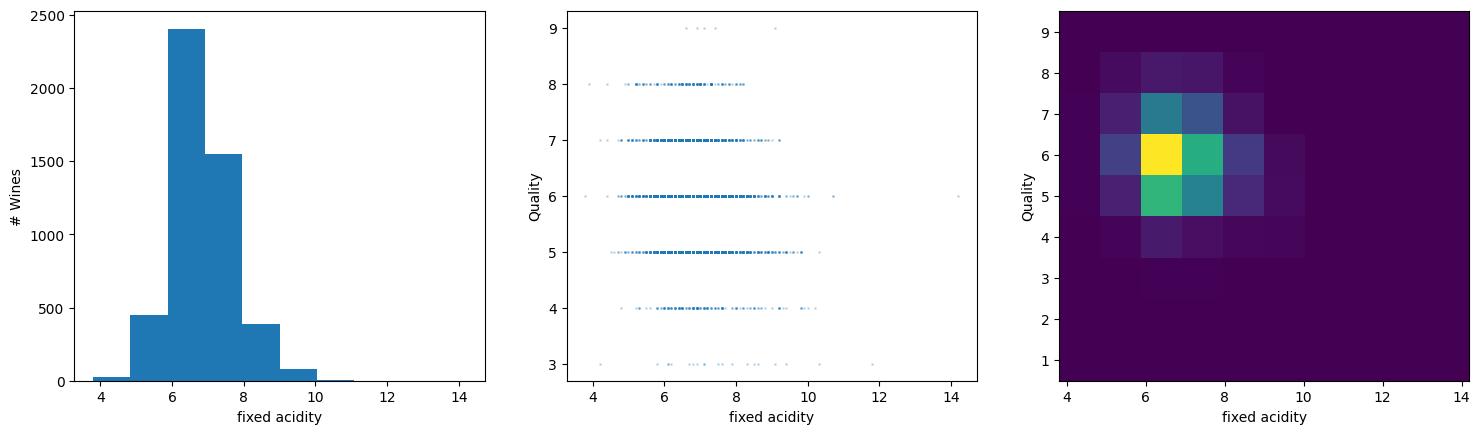

Feature: volatile acidity
Correlation coefficient in regards to quality: -0.195


<Figure size 640x480 with 0 Axes>

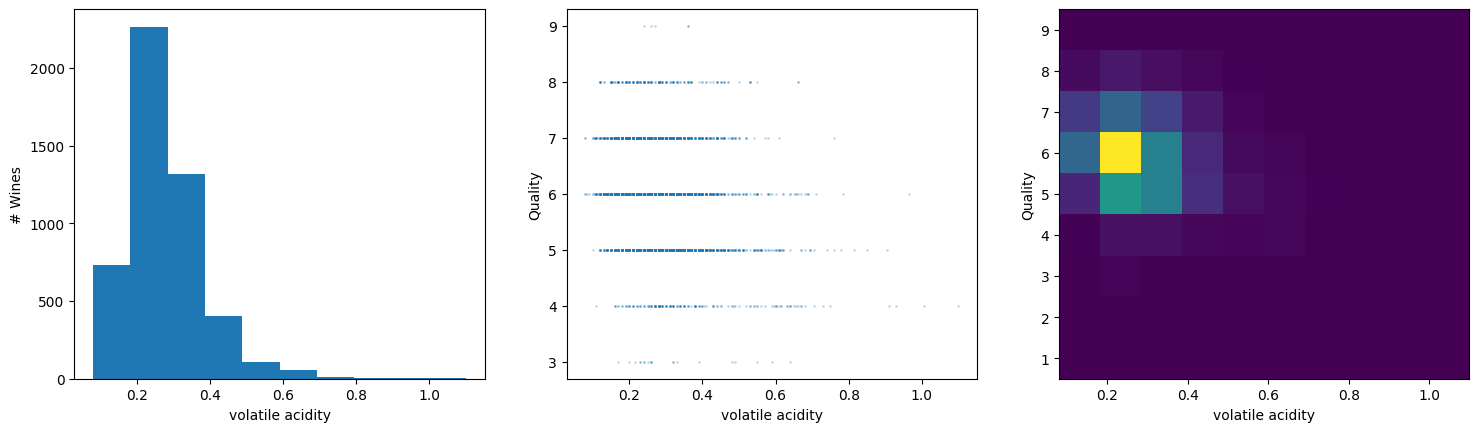

Feature: citric acid
Correlation coefficient in regards to quality: -0.009


<Figure size 640x480 with 0 Axes>

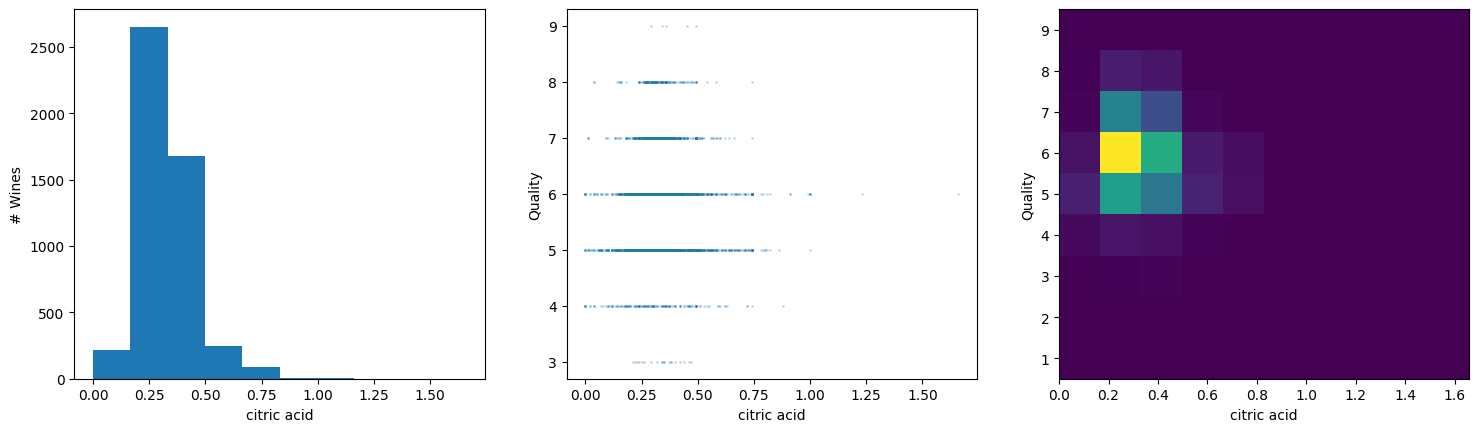

Feature: residual sugar
Correlation coefficient in regards to quality: -0.098


<Figure size 640x480 with 0 Axes>

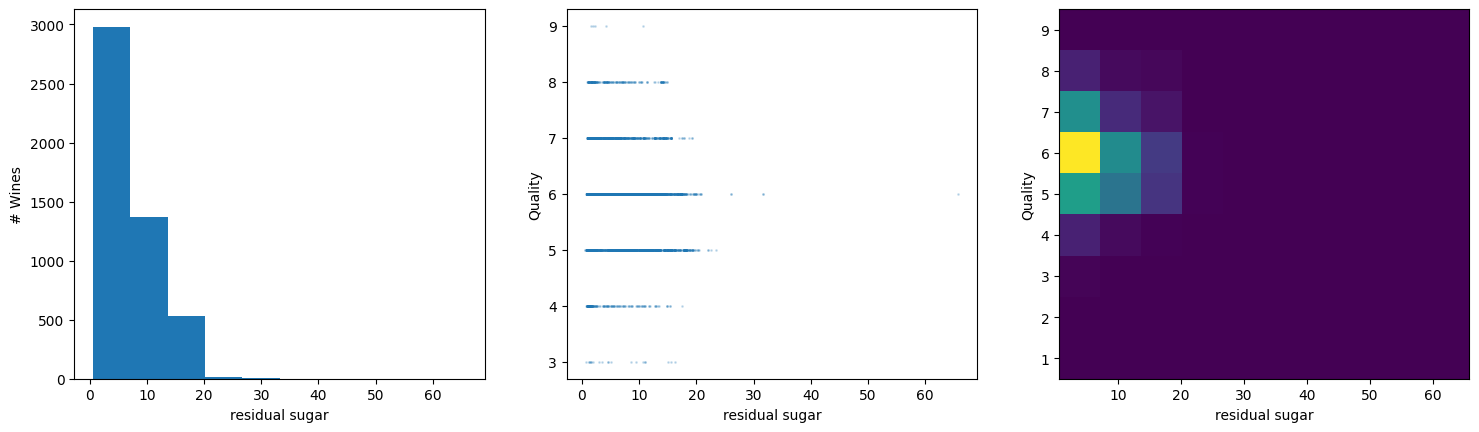

Feature: chlorides
Correlation coefficient in regards to quality: -0.210


<Figure size 640x480 with 0 Axes>

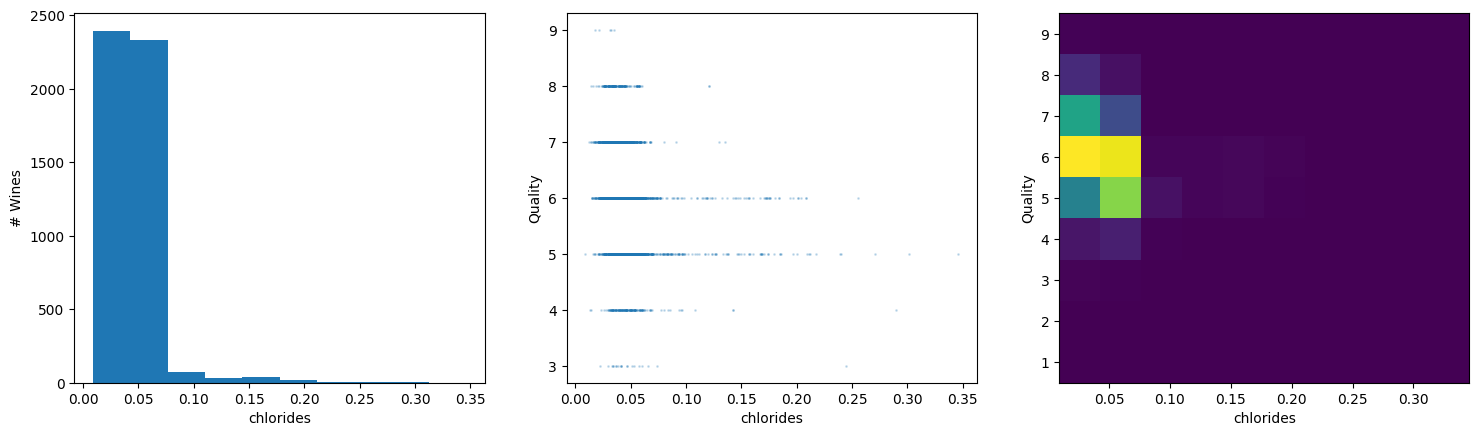

Feature: free sulfur dioxide
Correlation coefficient in regards to quality: 0.008


<Figure size 640x480 with 0 Axes>

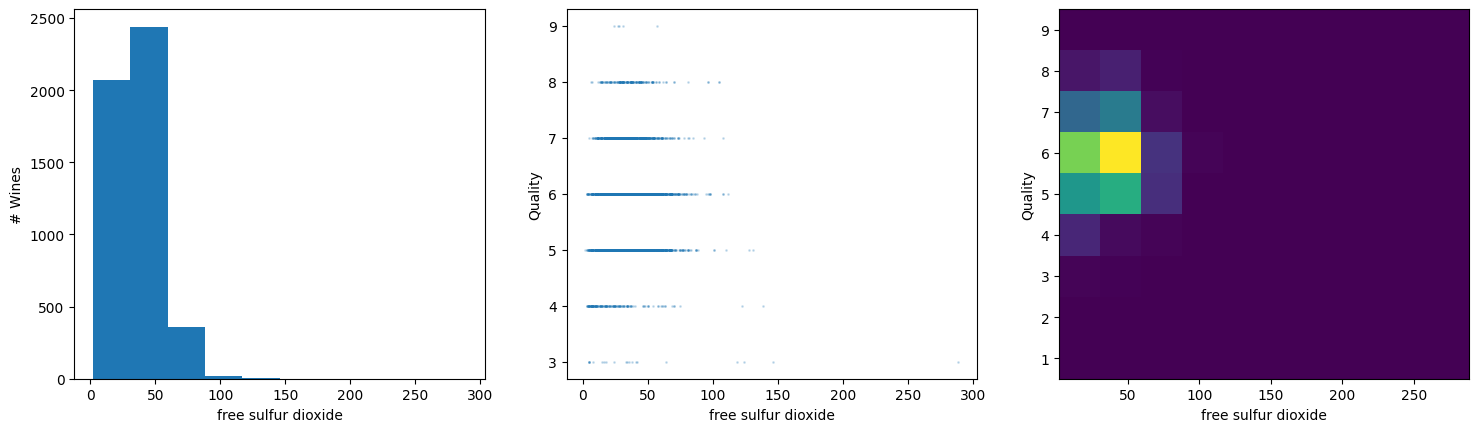

Feature: total sulfur dioxide
Correlation coefficient in regards to quality: -0.175


<Figure size 640x480 with 0 Axes>

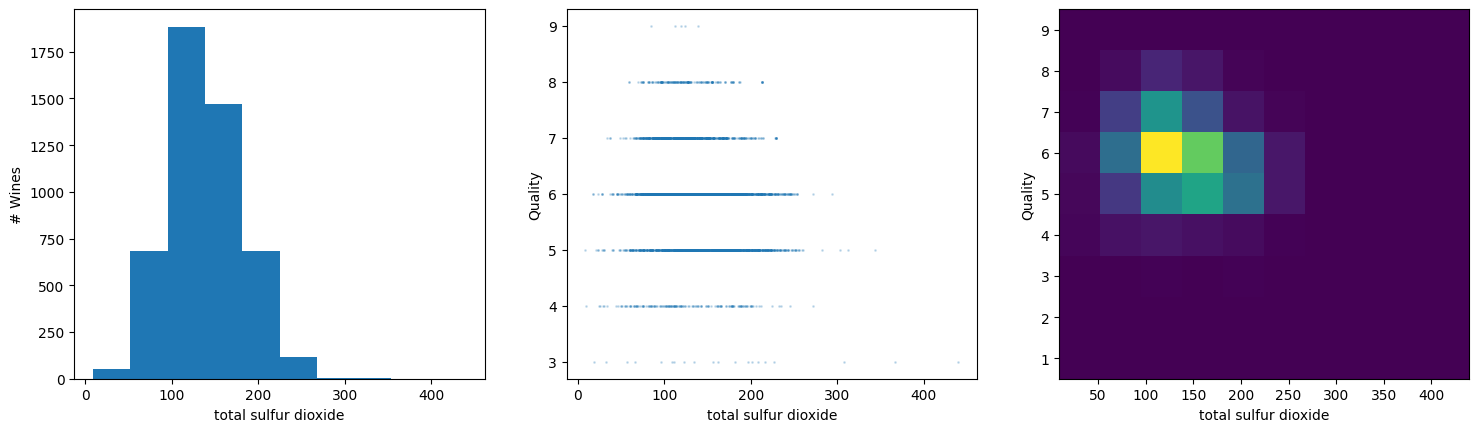

Feature: density
Correlation coefficient in regards to quality: -0.307


<Figure size 640x480 with 0 Axes>

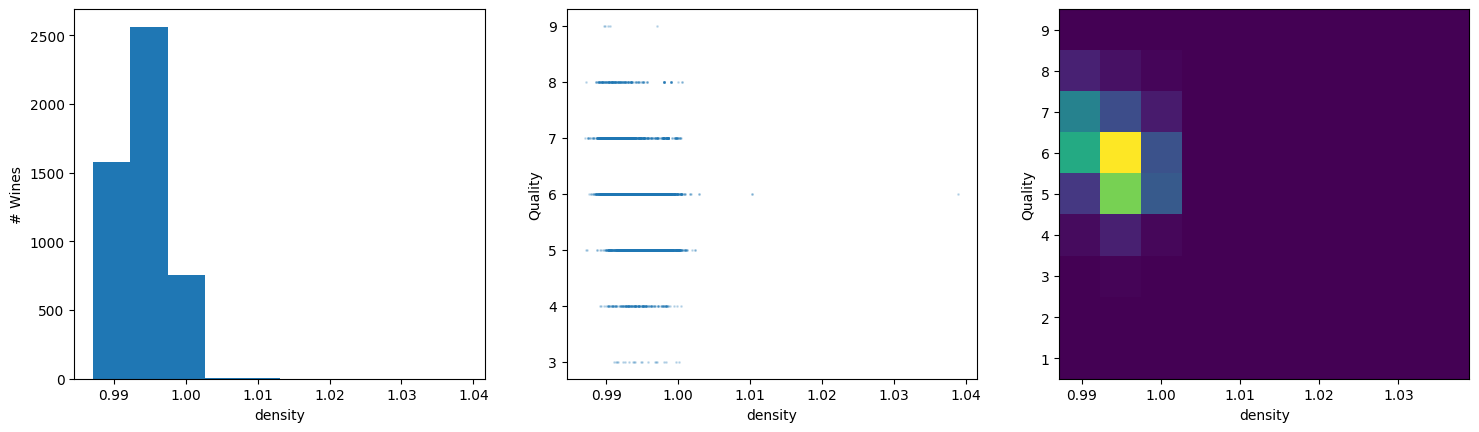

Feature: pH
Correlation coefficient in regards to quality: 0.099


<Figure size 640x480 with 0 Axes>

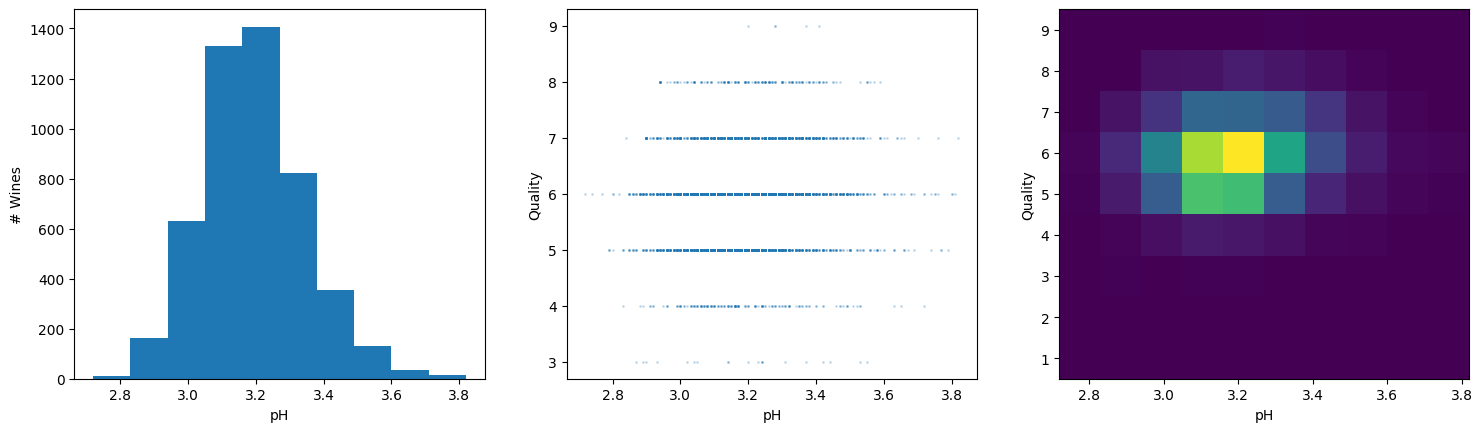

Feature: sulphates
Correlation coefficient in regards to quality: 0.054


<Figure size 640x480 with 0 Axes>

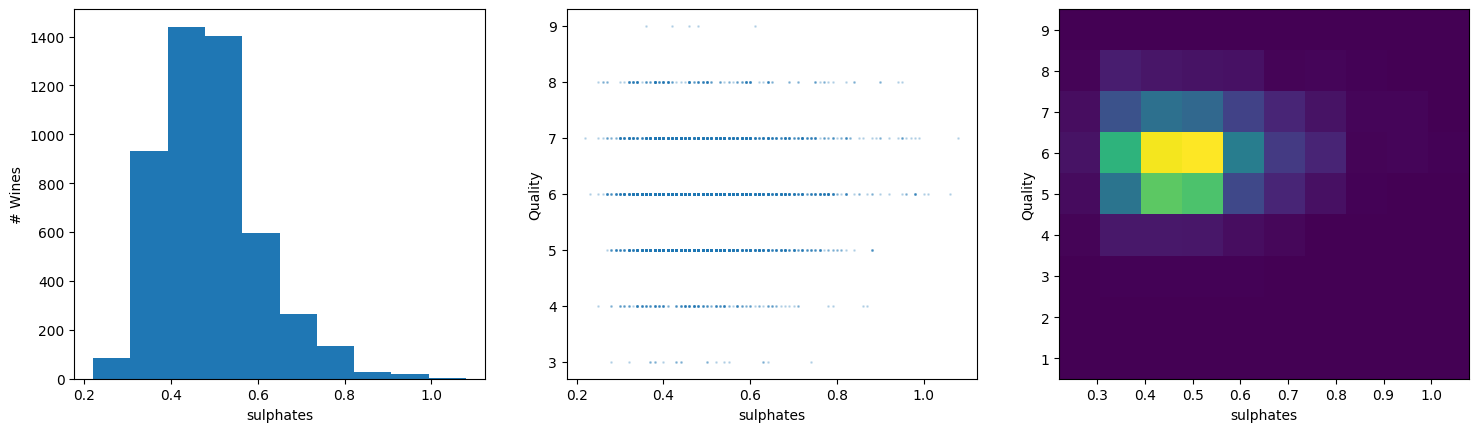

Feature: alcohol
Correlation coefficient in regards to quality: 0.436


<Figure size 640x480 with 0 Axes>

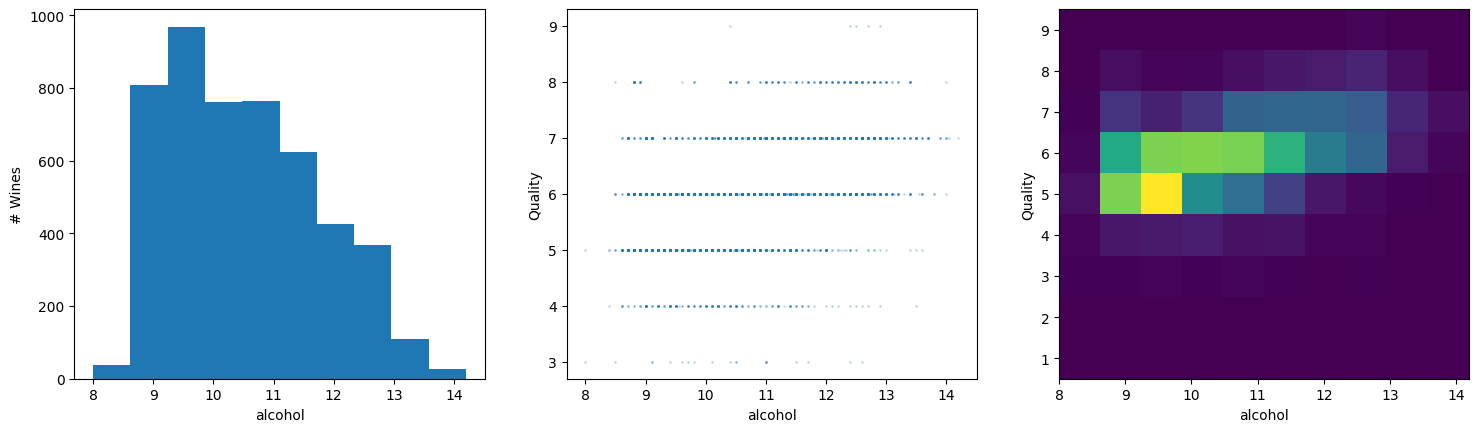

In [64]:
features = ["fixed acidity", "volatile acidity", "citric acid",
            "residual sugar", "chlorides", "free sulfur dioxide",
            "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
cor_coef_lst = []
# Loop over all features
for i_feat, feat in enumerate(features):
    plt.clf()
    print(f"Feature: {feat}")
    print(f"Correlation coefficient in regards to quality: {np.corrcoef(df_white.iloc[:,i_feat],df_white.iloc[:,11])[0,1]:.3f}") # Calulate correlation coefficient
    cor_coef_lst.append(np.corrcoef(df_white.iloc[:,i_feat],df_white.iloc[:,11])[0,1])

    plt.figure().set_figwidth(18)
    # 1D Histogram
    plt.subplot(1, 3, 1)
    plt.hist(df_white.iloc[:,i_feat])
    plt.xlabel(feat)
    plt.ylabel("# Wines")
    #plt.show()

    # Scatter Plot
    plt.subplot(1, 3, 2)
    plt.scatter(df_white.iloc[:,i_feat],df_white.iloc[:,11], s=1, alpha=0.2)
    plt.xlabel(feat)
    plt.ylabel("Quality")
    #ax2.show()

    # Scatter Plot
    plt.subplot(1, 3, 3)
    plt.hist2d(df_white.iloc[:,i_feat],df_white.iloc[:,11], bins=[10, np.arange(0.5, 10.5, 1)])
    plt.xlabel(feat)
    plt.ylabel("Quality")
    plt.show()

white_max_cor_coef = max(cor_coef_lst)

## Red wine

Feature: fixed acidity
Correlation coefficient in regards to quality: 0.124


<Figure size 640x480 with 0 Axes>

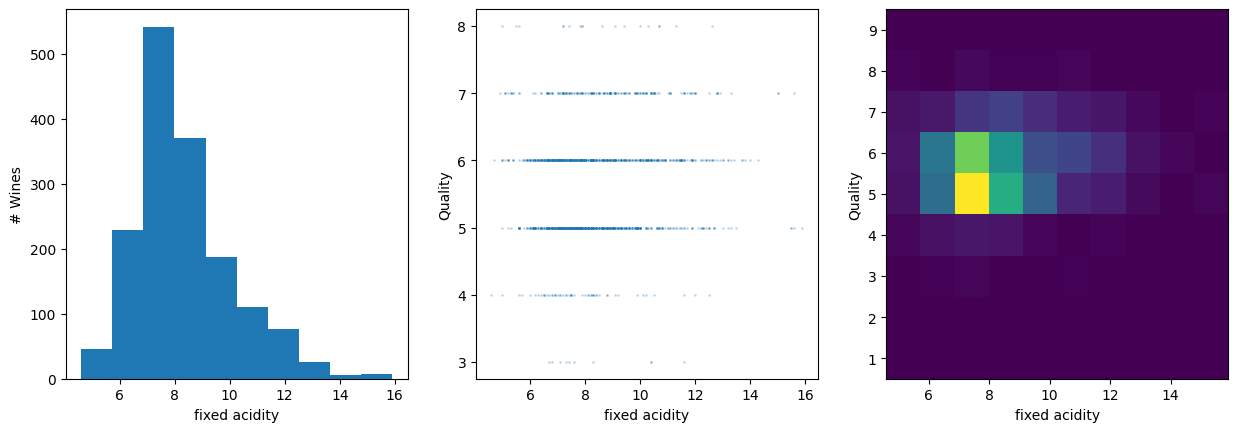

Feature: volatile acidity
Correlation coefficient in regards to quality: -0.391


<Figure size 640x480 with 0 Axes>

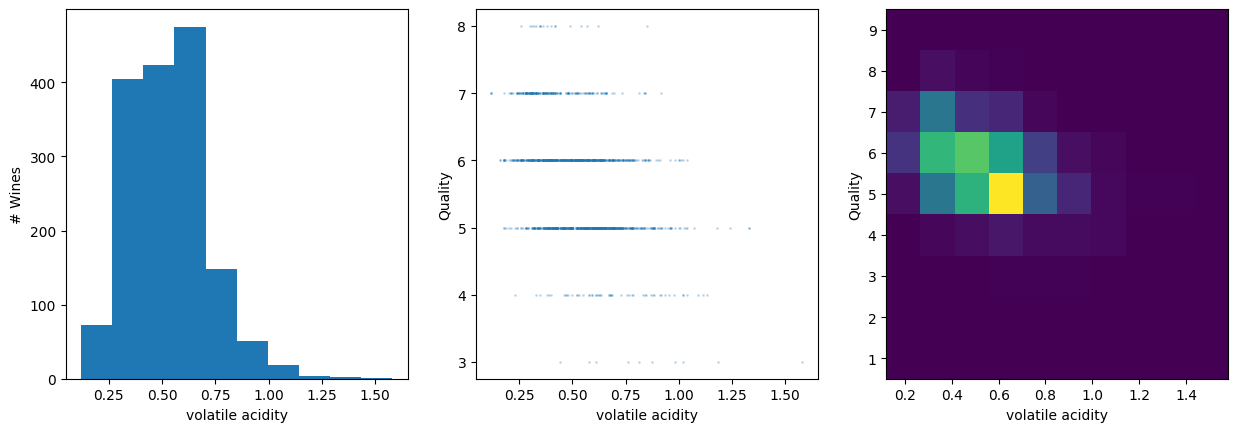

Feature: citric acid
Correlation coefficient in regards to quality: 0.226


<Figure size 640x480 with 0 Axes>

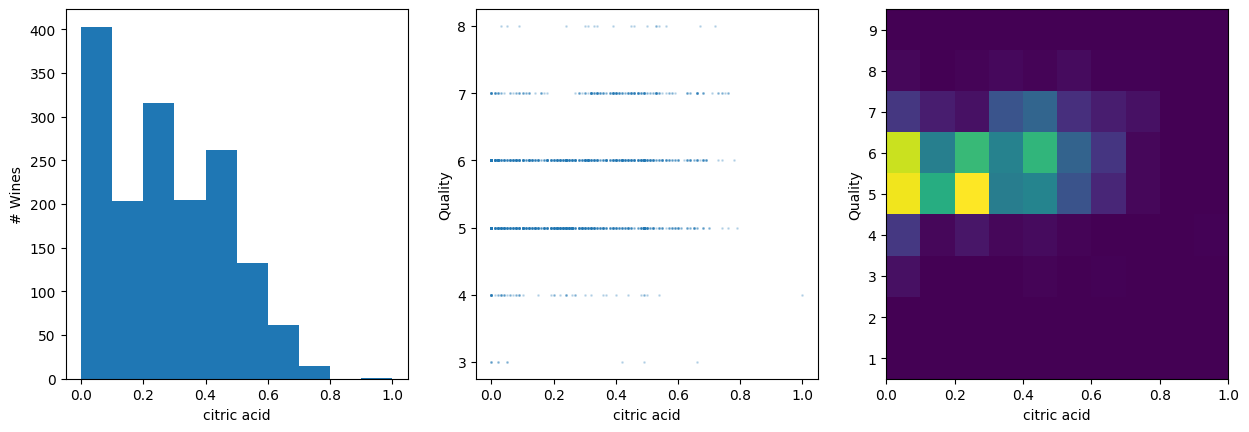

Feature: residual sugar
Correlation coefficient in regards to quality: 0.014


<Figure size 640x480 with 0 Axes>

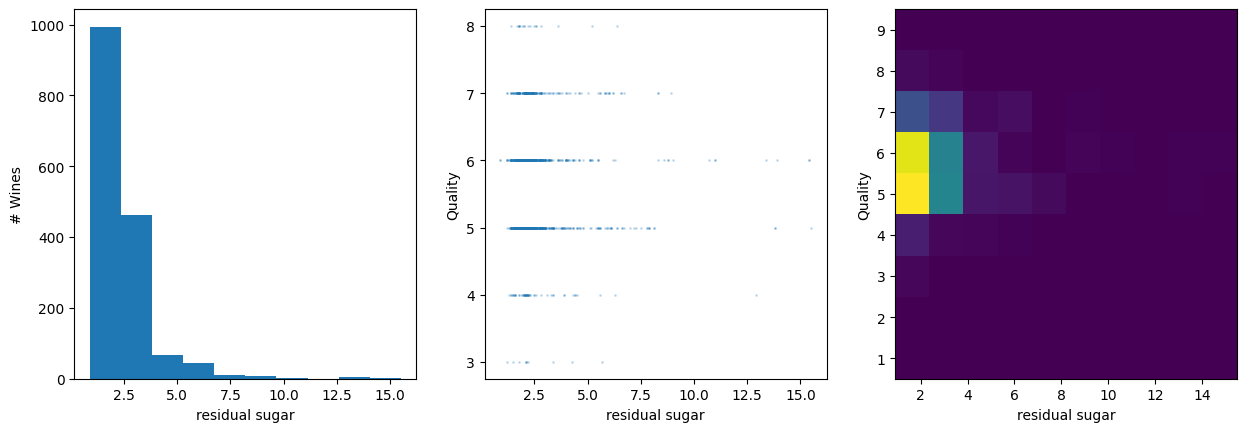

Feature: chlorides
Correlation coefficient in regards to quality: -0.129


<Figure size 640x480 with 0 Axes>

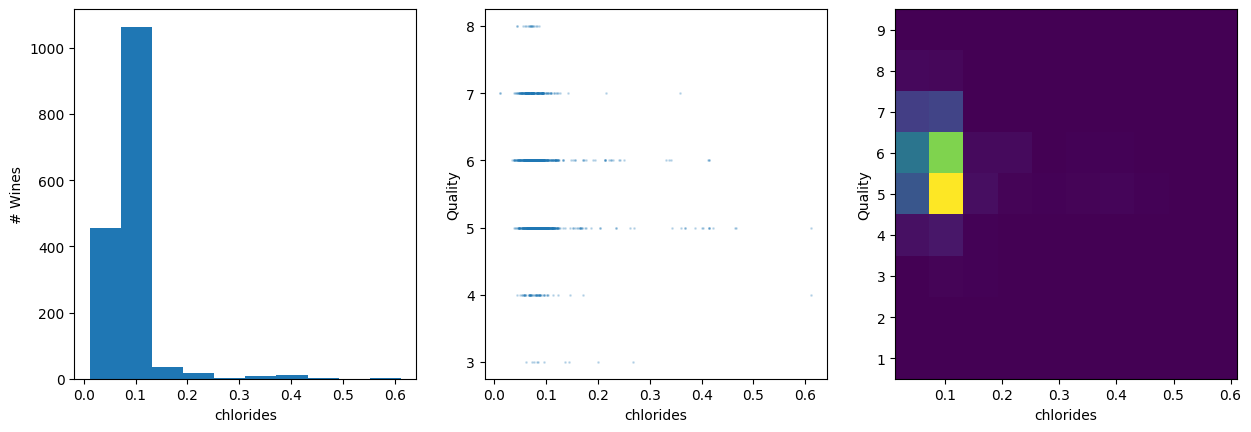

Feature: free sulfur dioxide
Correlation coefficient in regards to quality: -0.051


<Figure size 640x480 with 0 Axes>

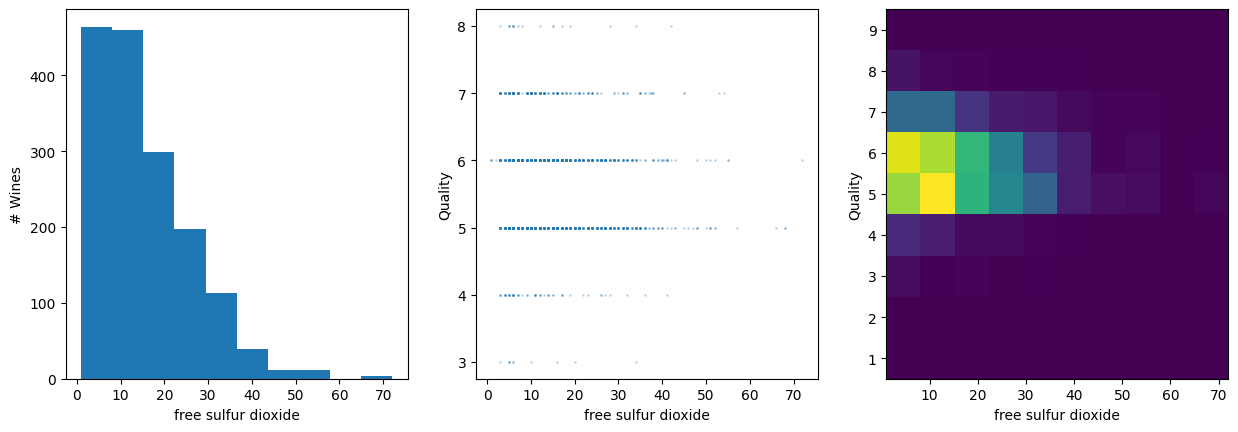

Feature: total sulfur dioxide
Correlation coefficient in regards to quality: -0.185


<Figure size 640x480 with 0 Axes>

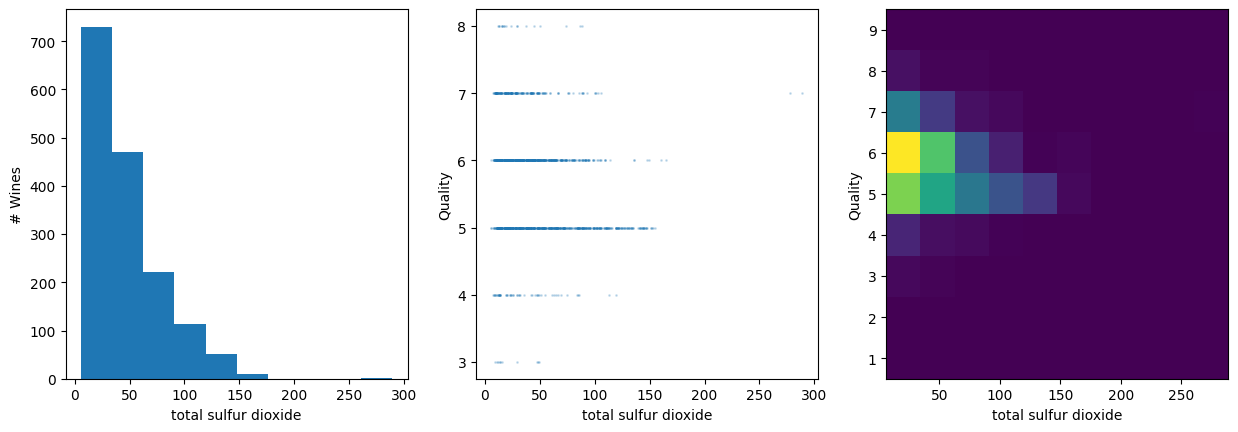

Feature: density
Correlation coefficient in regards to quality: -0.175


<Figure size 640x480 with 0 Axes>

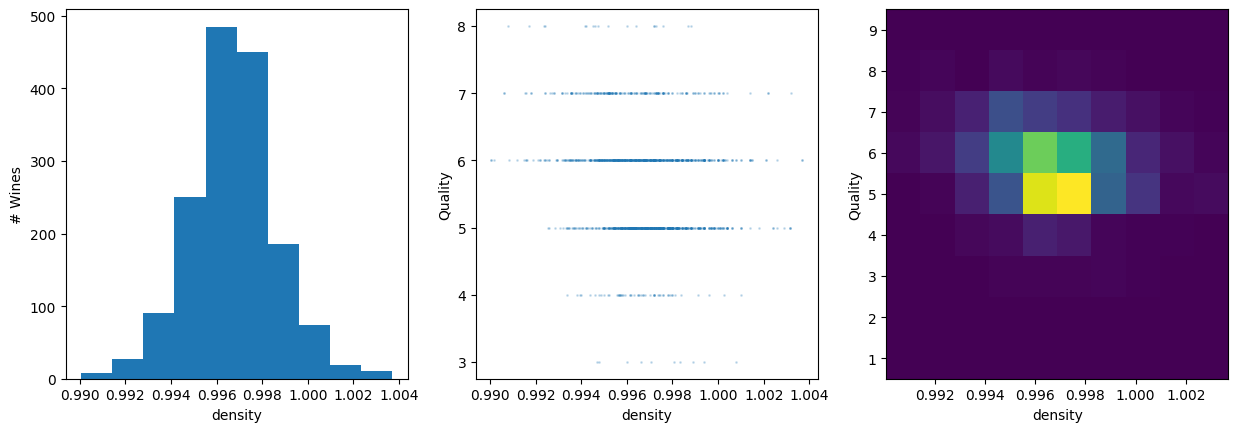

Feature: pH
Correlation coefficient in regards to quality: -0.058


<Figure size 640x480 with 0 Axes>

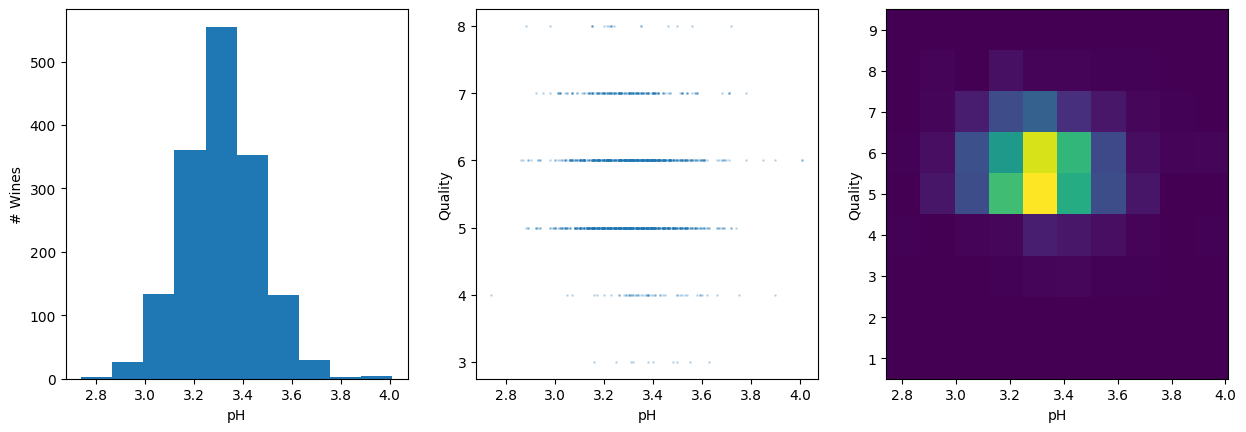

Feature: sulphates
Correlation coefficient in regards to quality: 0.251


<Figure size 640x480 with 0 Axes>

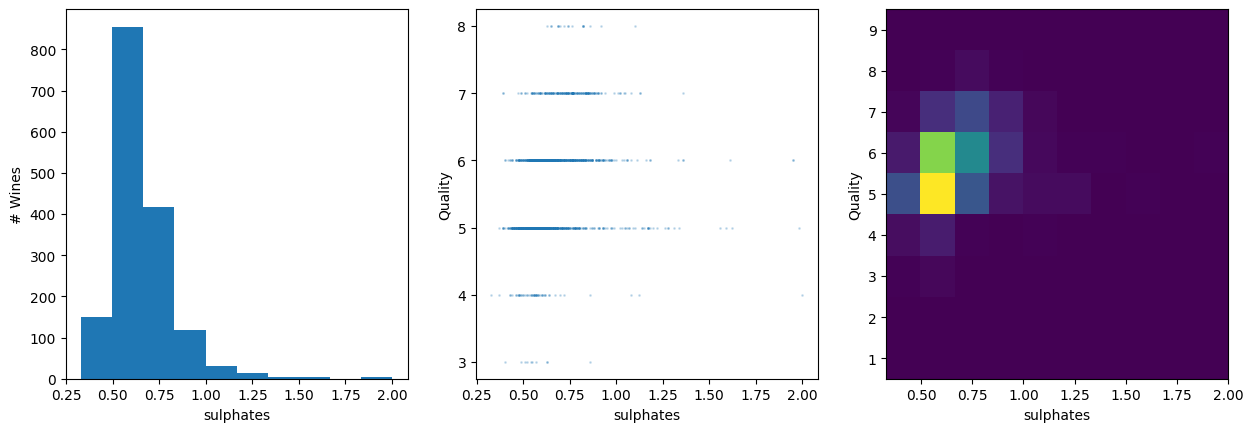

Feature: alcohol
Correlation coefficient in regards to quality: 0.476


<Figure size 640x480 with 0 Axes>

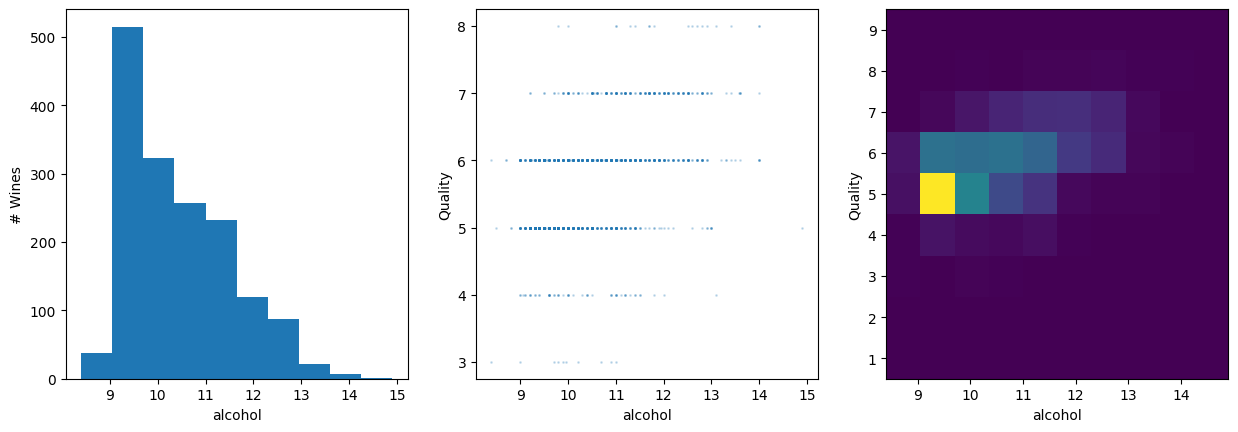

In [65]:
features = ["fixed acidity", "volatile acidity", "citric acid",
            "residual sugar", "chlorides", "free sulfur dioxide",
            "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]

cor_coef_lst = []
# Loop over all features
for i_feat, feat in enumerate(features):
    plt.clf()
    print(f"Feature: {feat}")
    print(f"Correlation coefficient in regards to quality: {np.corrcoef(df_red.iloc[:,i_feat],df_red.iloc[:,11])[0,1]:.3f}") # Calulate correlation coefficient
    cor_coef_lst.append(np.corrcoef(df_red.iloc[:,i_feat],df_red.iloc[:,11])[0,1])
    plt.figure().set_figwidth(15)

    # 1D Histogram
    plt.subplot(1, 3, 1)
    plt.hist(df_red.iloc[:,i_feat])
    plt.xlabel(feat)
    plt.ylabel("# Wines")


    # Scatter Plot
    plt.subplot(1, 3, 2)
    plt.scatter(df_red.iloc[:,i_feat],df_red.iloc[:,11], s=1, alpha=0.2)
    plt.xlabel(feat)
    plt.ylabel("Quality")


    # Scatter Plot
    plt.subplot(1, 3, 3)
    plt.hist2d(df_red.iloc[:,i_feat],df_red.iloc[:,11], bins=[10, np.arange(0.5, 10.5, 1)])
    plt.xlabel(feat)
    plt.ylabel("Quality")
    plt.show()

red_max_cor_coef = max(cor_coef_lst)

The highest feature correlation in regards to quality both for the white and the red wine was alcohol with a correlation coefficient of

In [66]:
print(f'white: {white_max_cor_coef}')
print(f'red: {red_max_cor_coef}')

white: 0.4355747154613725
red: 0.47616632400113584


#PCA

two approaches considered, including and excluding the quality in the **PCA**

In [67]:
# Implementing a second feature for the approach including the quality
features_2 = ["fixed acidity", "volatile acidity", "citric acid",
            "residual sugar", "chlorides", "free sulfur dioxide",
            "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "Quality"]

##White

In [68]:
# copy for safety
df_pca = df_white.copy()

In [69]:
# for the PCA
y = df_pca["quality"].copy()
X = df_pca.drop("quality", axis=1).copy()

#scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#
df_X_scaled = pd.DataFrame(X_scaled)
df_X_scaled.columns = features

# print head
df_X_scaled.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203


In [70]:
# The PCA including the quality
X_2 = df_pca

#scaling
scaler = StandardScaler()
X_scaled_2 = scaler.fit_transform(X_2)

#
df_X_scaled_2 = pd.DataFrame(X_scaled_2)
df_X_scaled_2.columns = features_2

# print head
df_X_scaled_2.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,0.13787
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0.13787
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.13787
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.13787


In [71]:
# Making the PCA objects for the two approaches
pca = PCA()
pca.fit(X_scaled)

pca_2 = PCA()
pca_2.fit(X_scaled_2)

# Get component matrixes
component_matrix = pca.components_
component_matrix_2 = pca_2.components_

# To dataframe
df_component_matrix = pd.DataFrame(component_matrix)
df_component_matrix_2 = pd.DataFrame(component_matrix_2)

# Set the column names
df_component_matrix.columns = features
df_component_matrix_2.columns = features_2

# Set labels
index_labels = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11']
index_labels_2 = index_labels + ['PC 12']
df_component_matrix.set_axis(index_labels, axis='index')
df_component_matrix_2.set_axis(index_labels_2, axis='index')

# Transpose the DataFrames
transposed_data = df_component_matrix.T
transposed_data_2 = df_component_matrix_2.T

# Print DataFrames
display_side_by_side([transposed_data, transposed_data_2], ["<h1>excluding the quality</h1>", "<h1>including the quality</h1>"])

,0,1,2,3,4,5,6,7,8,9,10
fixed acidity,0.157218,0.587558,-0.121368,0.018584,0.251048,-0.103531,-0.197849,0.588355,0.330523,-0.131705,-0.171290
volatile acidity,0.005089,-0.051728,0.590971,0.274115,0.642617,0.122338,0.269355,0.028373,-0.145910,-0.223722,-0.017057
citric acid,0.144050,0.345295,-0.504397,0.148514,0.053905,0.132097,0.705481,-0.152287,-0.202011,-0.037351,-0.009721
residual sugar,0.427408,-0.008749,0.214320,-0.273765,0.011391,-0.289447,0.212760,-0.388186,0.408969,0.094468,-0.490226
chlorides,0.212011,0.008800,0.102367,0.710712,-0.328628,0.395821,-0.079484,-0.100151,0.393535,0.053374,-0.025399
free sulfur dioxide,0.300334,-0.290355,-0.279410,-0.305585,0.176912,0.494494,-0.166779,-0.081799,0.144073,-0.567451,0.030908
total sulfur dioxide,0.406652,-0.244032,-0.124375,-0.060456,0.293010,0.276320,-0.067730,0.247314,-0.154540,0.709120,-0.035561
density,0.511524,-0.006297,0.129203,-0.022061,-0.084588,-0.327651,0.110385,0.069026,0.087888,-0.068374,0.759779
pH,-0.128832,-0.581344,-0.126672,0.097753,-0.119826,-0.193341,0.427313,0.533881,0.261298,-0.110733,-0.141197
sulphates,0.043379,-0.222695,-0.433244,0.442060,0.400585,-0.481039,-0.308562,-0.270394,-0.011698,-0.057708,-0.041833


In [72]:
# Calculate eigenvalues and explained variance
eigenvalues = pca.explained_variance_
eigenvalues_2 = pca_2.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_ * 100
explained_variance_ratio_2 = pca_2.explained_variance_ratio_ * 100
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
cumulative_explained_variance_2 = np.cumsum(explained_variance_ratio_2)

eigen_df = pd.DataFrame(eigenvalues)
eigen_df_2 = pd.DataFrame(eigenvalues_2)
explained_variance_ratio_df = pd.DataFrame(explained_variance_ratio)
explained_variance_ratio_df_2 = pd.DataFrame(explained_variance_ratio_2)
cumulative_explained_variance_df = pd.DataFrame(cumulative_explained_variance)
cumulative_explained_variance_df_2 = pd.DataFrame(cumulative_explained_variance_2)

# Concatenate the dataframes into a single dataframe
eigenvalue_proportion = pd.concat([eigen_df, explained_variance_ratio_df, cumulative_explained_variance_df], axis=1)
eigenvalue_proportion_2 = pd.concat([eigen_df_2, explained_variance_ratio_df_2, cumulative_explained_variance_df_2], axis=1)
eigenvalue_proportion.columns = ['Total', '%Variance', 'Cumulative%']
eigenvalue_proportion_2.columns = ['Total', '%Variance', 'Cumulative%']

display_side_by_side([eigenvalue_proportion, eigenvalue_proportion_2], ["excluding the quality", "including the quality"])

,Total,%Variance,Cumulative%
0,3.222912,29.293217,29.293217
1,1.575562,14.320363,43.613580
2,1.221921,11.106103,54.719683
3,1.018730,9.259294,63.978977
4,0.973533,8.848496,72.827474
5,0.938933,8.534014,81.361487
6,0.726746,6.605437,87.966924
7,0.599481,5.448713,93.415637
8,0.414228,3.764942,97.180580
9,0.289546,2.631701,99.812281


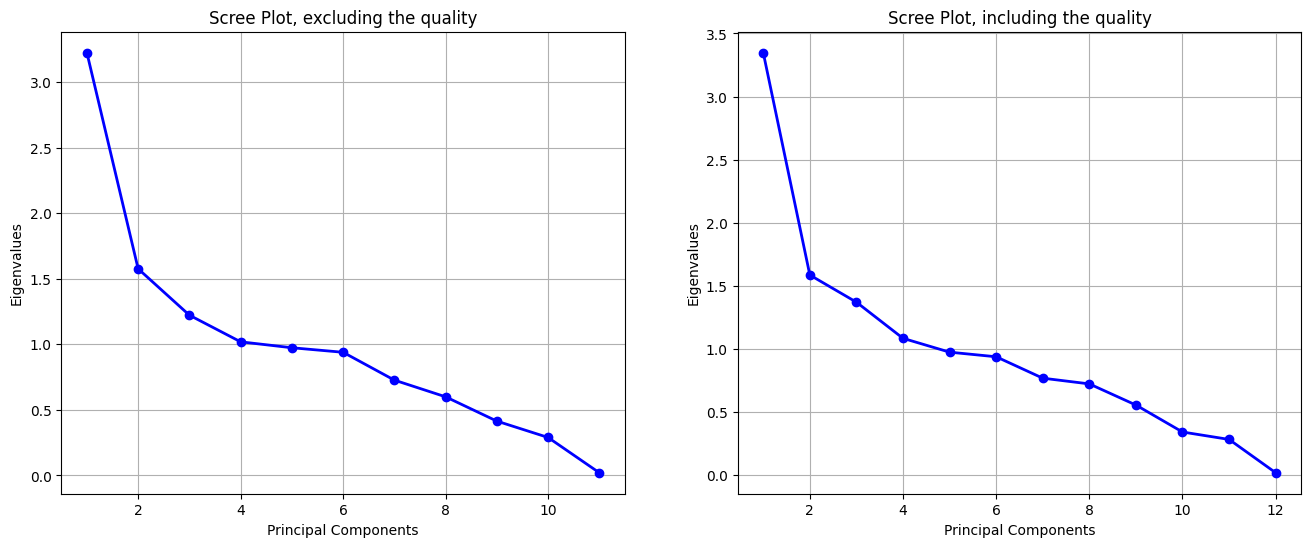

In [73]:
# Make scree plot
#plt.figure(figsize=(8, 6))
f, axs = plt.subplots(1, 2, figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'bo-', linewidth=2,)

plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot, excluding the quality')
plt.grid(True)
#plt.show()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(eigenvalues_2) + 1), eigenvalues_2, 'bo-', linewidth=2)
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot, including the quality')
plt.grid(True)
plt.show()


When excluding the quality we get 4-6 principal components with a high enough relevance explaining the variance.

When including the quality we get 4-6 principal components with a high enough relevance explaining the variance.

While this gives an indication on/visualize the correlation between the portion of the variance and the addition of principle components it is not that intuitive in how that corresponds to the cumulatice variance, which is relevant to achieve statistical relevance.

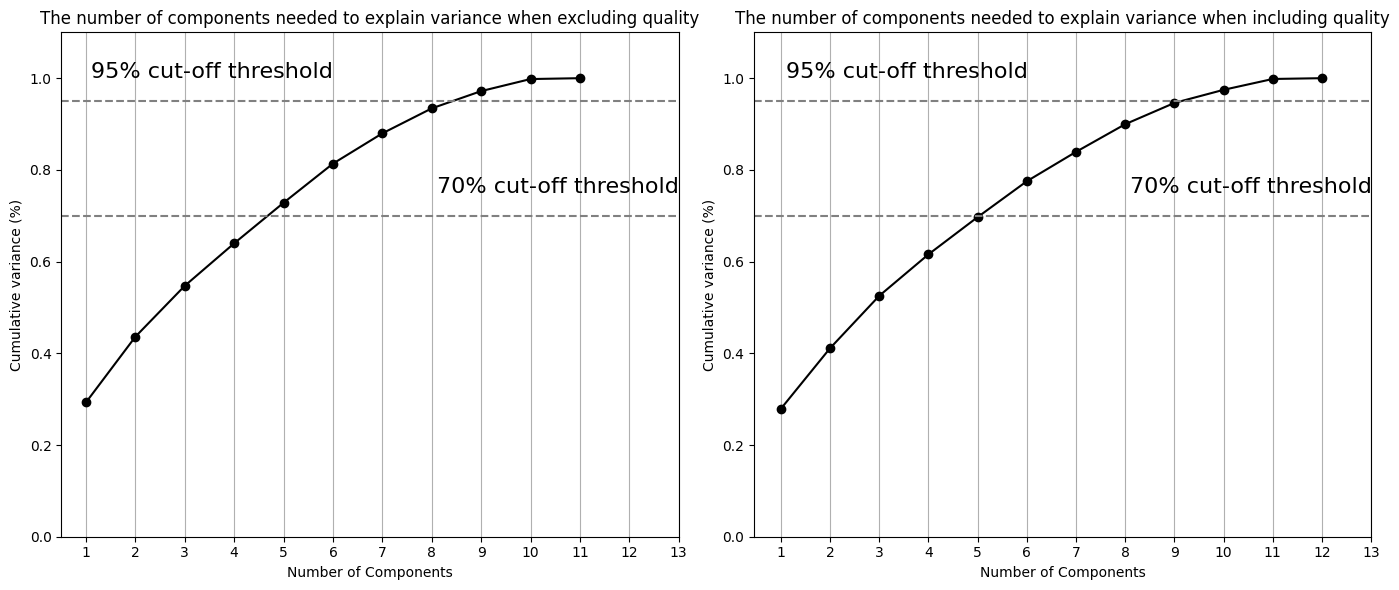

In [74]:
f, axs = plt.subplots(1, 2, figsize=(14, 6))

plt.subplot(1, 2, 1)
xi = np.arange(1, 12, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='-', color='black')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 14, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance when excluding quality')

plt.axhline(y=0.7, color='grey', linestyle='--')
plt.text(8.1, 0.75, '70% cut-off threshold', color = 'black', fontsize=16)

plt.axhline(y=0.95, color='grey', linestyle='--')
plt.text(1.1, 1, '95% cut-off threshold', color = 'black', fontsize=16)


plt.tight_layout()
plt.savefig('pcavisualize_1.png', dpi=300)


plt.subplot(1, 2, 2)
xi = np.arange(1, 13, step=1)
yi = np.cumsum(pca_2.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='-', color='black')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 14, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance when including quality')

plt.axhline(y=0.7, color='grey', linestyle='--')
plt.text(8.1, 0.75, '70% cut-off threshold', color = 'black', fontsize=16)

plt.axhline(y=0.95, color='grey', linestyle='--')
plt.text(1.1, 1, '95% cut-off threshold', color = 'black', fontsize=16)

plt.tight_layout()
plt.savefig('pcavisualize_1.png', dpi=300)

for ax in axs:
  ax.grid(axis='x')
plt.show()

To get a statistically relevant model(95% variance explained) it could be argued that 8-9 components are needed. Using the 4 - 6 principal components indicated in the last step gives an explanatory capability in the area of 60-80%, a few points higher for the model excluding quality than the version including quality.

To further our understanding of the components explanatory capability we visualize how the number of components compare to the full dataset. The components are transposed back to the initial data and ploted to show how well each added component represents the full dataset.

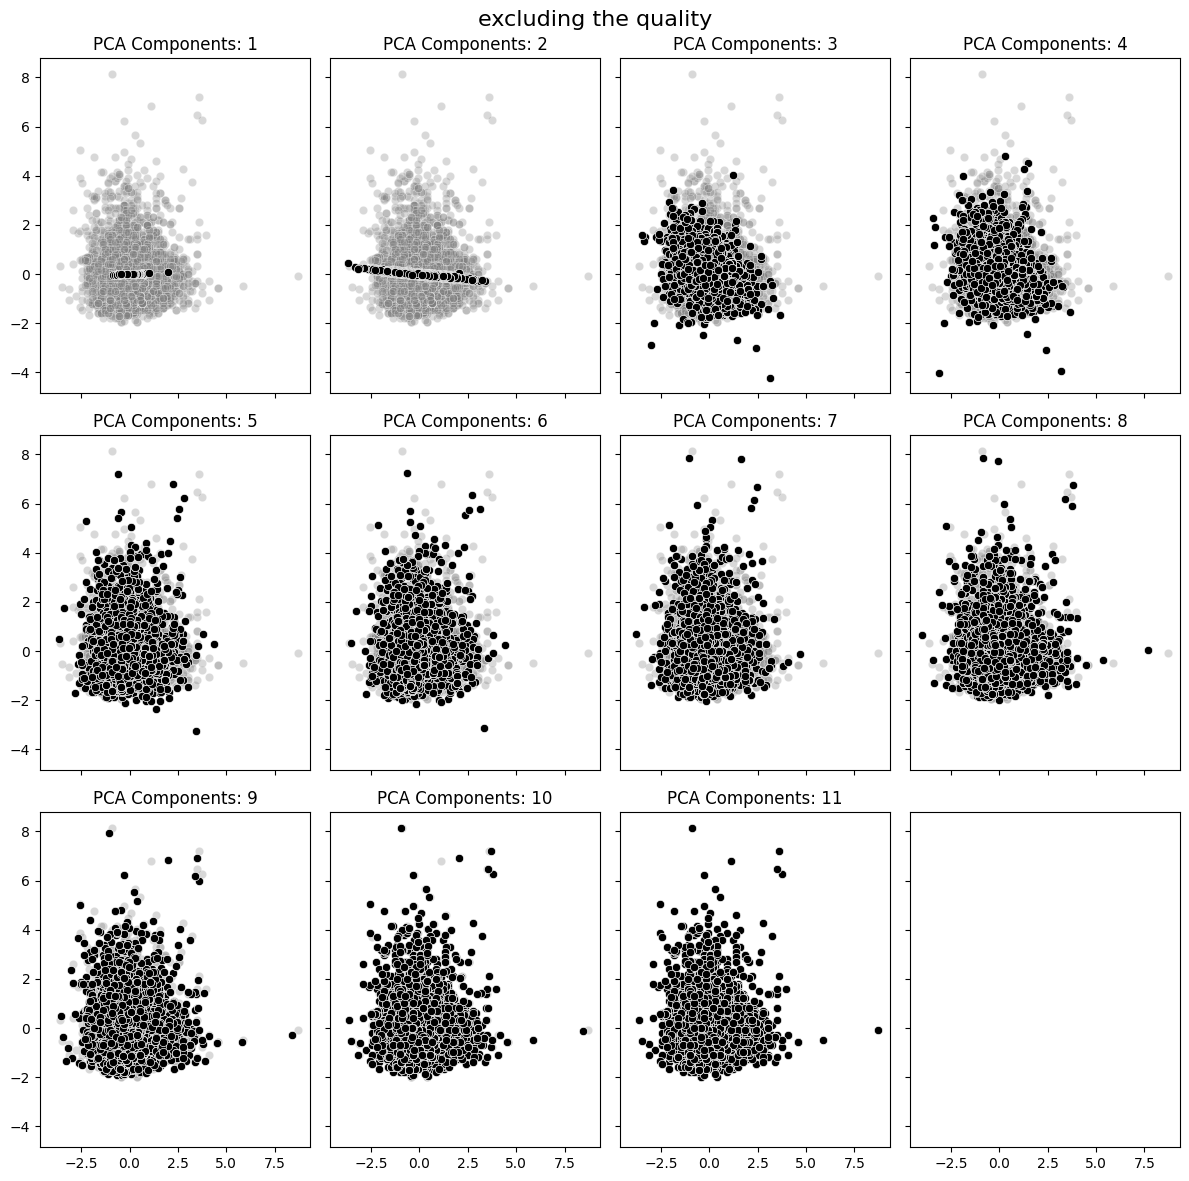

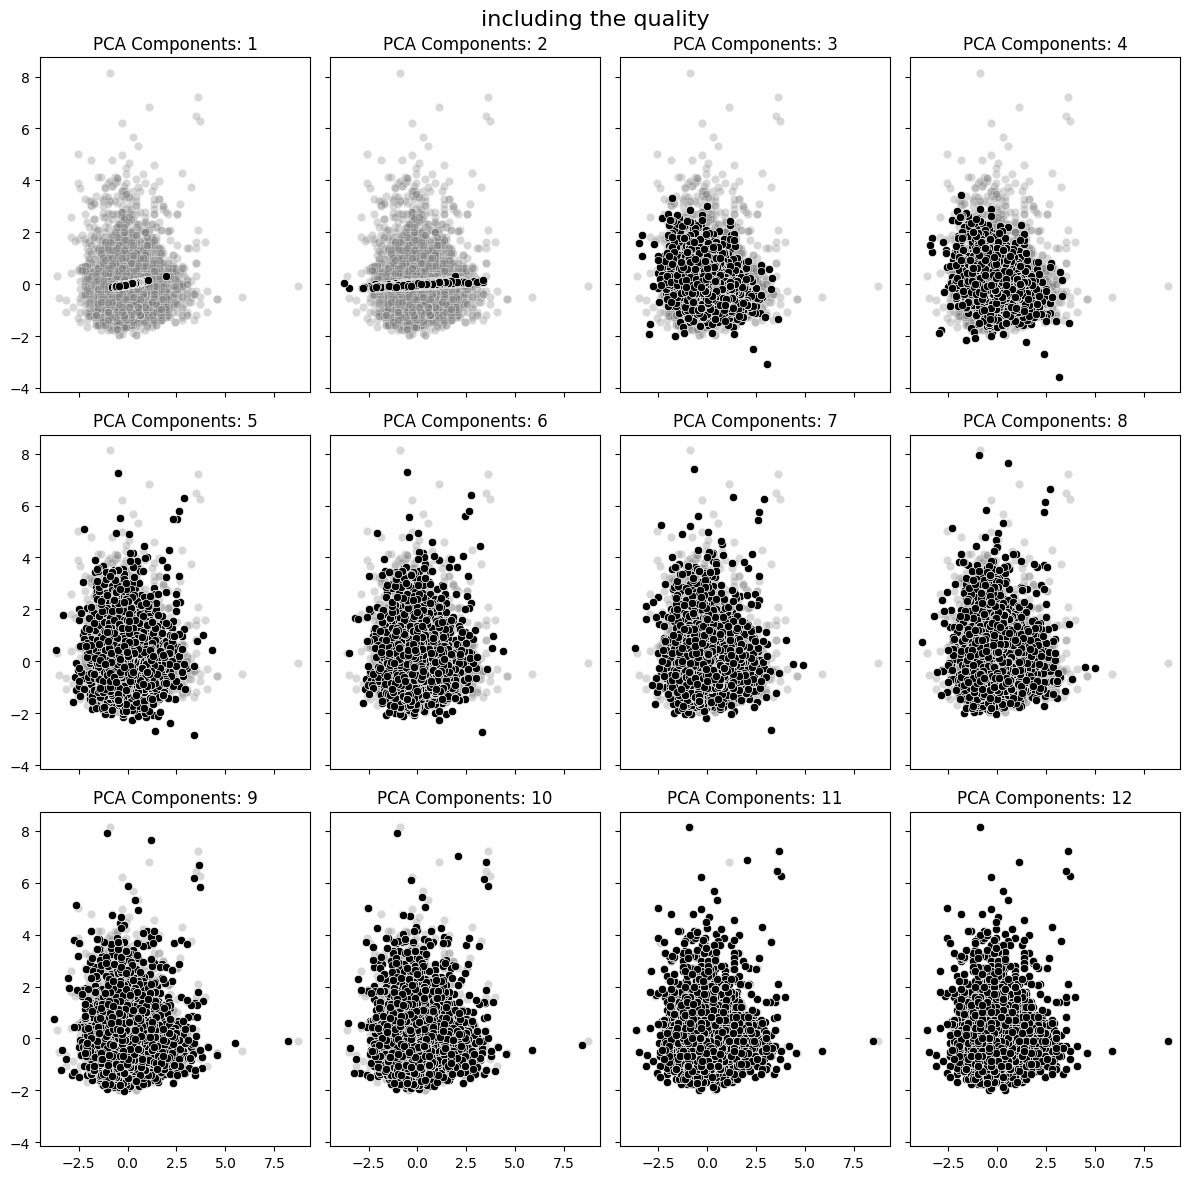

In [75]:
labelinfo = ["excluding the quality", "including the quality"]

def transform_pca(X, n):

    pca = PCA(n_components=n)
    pca.fit(X)
    X_new = pca.inverse_transform(pca.transform(X))

    return X_new

rows = 3
cols = 4
comps = 1

for X_scaled_rerun in [X_scaled, X_scaled_2]:
  fig, axes = plt.subplots(rows,
                          cols,
                          figsize=(12,12),
                          sharex=True,
                          sharey=True)

  for row in range(rows):
      for col in range(cols):
          try:
              X_new = transform_pca(X_scaled_rerun, comps)
              ax = sns.scatterplot(x=X_scaled_rerun[:, 0],
                                  y=X_scaled_rerun[:, 1],
                                  ax=axes[row, col],
                                  color='grey',
                                  alpha=.3)
              ax = sns.scatterplot(x=X_new[:, 0],
                                  y=X_new[:, 1],
                                  ax=axes[row, col],
                                  color='black')
              ax.set_title(f'PCA Components: {comps}');

              comps += 1
          except:
              pass
  fig.suptitle(f'{labelinfo[comps-12]}', fontsize=16)
  plt.tight_layout()
  plt.show()
  comps = 1

This visualization is a great sanitycheck for our current approach to number of principal components to explain the data.

In [76]:
transposed_data_save = transposed_data.copy()
transposed_data_2_save = transposed_data_2.copy()
transposed_data_save_test = transposed_data.copy()

# Conservative approach: keeping 4
transposed_data = transposed_data.drop(columns=transposed_data.columns[5:11])
transposed_data_2 = transposed_data_2.drop(columns=transposed_data_2.columns[5:12])

# inclusive approach: keeping 6
transposed_data_inc = transposed_data_save.drop(columns=transposed_data_save.columns[7:11])
transposed_data_2_inc = transposed_data_2_save.drop(columns=transposed_data_2_save.columns[7:12])

# sum square each observation from PC1 to PC5
transposed_data['sum_of_squares'] = transposed_data.apply(lambda x: sum(x ** 2), axis=1)
transposed_data_2['sum_of_squares'] = transposed_data_2.apply(lambda x: sum(x ** 2), axis=1)
transposed_data_inc['sum_of_squares'] = transposed_data_inc.apply(lambda x: sum(x ** 2), axis=1)
transposed_data_2_inc['sum_of_squares'] = transposed_data_2_inc.apply(lambda x: sum(x ** 2), axis=1)

In [77]:
display_side_by_side([transposed_data, transposed_data_2], ["excluding the quality", "including the quality"])

,0,1,2,3,4,sum_of_squares
fixed acidity,0.157218,0.587558,-0.121368,0.018584,0.251048,0.448043
volatile acidity,0.005089,-0.051728,0.590971,0.274115,0.642617,0.840044
citric acid,0.144050,0.345295,-0.504397,0.148514,0.053905,0.419357
residual sugar,0.427408,-0.008749,0.214320,-0.273765,0.011391,0.303765
chlorides,0.212011,0.008800,0.102367,0.710712,-0.328628,0.668614
free sulfur dioxide,0.300334,-0.290355,-0.279410,-0.305585,0.176912,0.377257
total sulfur dioxide,0.406652,-0.244032,-0.124375,-0.060456,0.293010,0.329897
density,0.511524,-0.006297,0.129203,-0.022061,-0.084588,0.286031
pH,-0.128832,-0.581344,-0.126672,0.097753,-0.119826,0.394519
sulphates,0.043379,-0.222695,-0.433244,0.442060,0.400585,0.595061


In [78]:
display_side_by_side([transposed_data_inc, transposed_data_2_inc], ["excluding the quality", "including the quality"])

,0,1,2,3,4,5,6,sum_of_squares
fixed acidity,0.157218,0.587558,-0.121368,0.018584,0.251048,-0.103531,-0.197849,0.497906
volatile acidity,0.005089,-0.051728,0.590971,0.274115,0.642617,0.122338,0.269355,0.927563
citric acid,0.144050,0.345295,-0.504397,0.148514,0.053905,0.132097,0.705481,0.934510
residual sugar,0.427408,-0.008749,0.214320,-0.273765,0.011391,-0.289447,0.212760,0.432811
chlorides,0.212011,0.008800,0.102367,0.710712,-0.328628,0.395821,-0.079484,0.831606
free sulfur dioxide,0.300334,-0.290355,-0.279410,-0.305585,0.176912,0.494494,-0.166779,0.649596
total sulfur dioxide,0.406652,-0.244032,-0.124375,-0.060456,0.293010,0.276320,-0.067730,0.410837
density,0.511524,-0.006297,0.129203,-0.022061,-0.084588,-0.327651,0.110385,0.405571
pH,-0.128832,-0.581344,-0.126672,0.097753,-0.119826,-0.193341,0.427313,0.614496
sulphates,0.043379,-0.222695,-0.433244,0.442060,0.400585,-0.481039,-0.308562,0.921670


## Red

In [79]:
# copy for safety
df_pca = df_red.copy()

In [80]:
# for the PCA
y = df_pca["quality"].copy()
X = df_pca.drop("quality", axis=1).copy()

#scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#
df_X_scaled = pd.DataFrame(X_scaled)
df_X_scaled.columns = features

# print head
df_X_scaled.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777


In [81]:
# The PCA including the quality
X_2 = df_pca

#scaling
scaler = StandardScaler()
X_scaled_2 = scaler.fit_transform(X_2)

#
df_X_scaled_2 = pd.DataFrame(X_scaled_2)
df_X_scaled_2.columns = features_2

# print head
df_X_scaled_2.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848


In [82]:
# Making the PCA objects for the two approaches
pca = PCA()
pca.fit(X_scaled)

pca_2 = PCA()
pca_2.fit(X_scaled_2)

# Get component matrixes
component_matrix = pca.components_
component_matrix_2 = pca_2.components_

# To dataframe
df_component_matrix = pd.DataFrame(component_matrix)
df_component_matrix_2 = pd.DataFrame(component_matrix_2)

# Set the column names
df_component_matrix.columns = features
df_component_matrix_2.columns = features_2

# Set labels
index_labels = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11']
index_labels_2 = index_labels + ['PC 12']
df_component_matrix.set_axis(index_labels, axis='index')
df_component_matrix_2.set_axis(index_labels_2, axis='index')

# Transpose the DataFrames
transposed_data = df_component_matrix.T
transposed_data_2 = df_component_matrix_2.T

# Print DataFrames
display_side_by_side([transposed_data, transposed_data_2], ["<h1>excluding the quality</h1>", "<h1>including the quality</h1>"])

,0,1,2,3,4,5,6,7,8,9,10
fixed acidity,0.489314,-0.110503,-0.123302,-0.229617,-0.082614,-0.101479,0.350227,0.177595,0.194021,-0.249523,0.639691
volatile acidity,-0.238584,0.274930,-0.449963,0.078960,0.218735,-0.411449,0.533735,0.078775,-0.129110,0.365925,0.002389
citric acid,0.463632,-0.151791,0.238247,-0.079418,-0.058573,-0.069593,-0.105497,0.377516,-0.381450,0.621677,-0.070910
residual sugar,0.146107,0.272080,0.101283,-0.372793,0.732144,-0.049156,-0.290663,-0.299845,0.007523,0.092872,0.184030
chlorides,0.212247,0.148052,-0.092614,0.666195,0.246501,-0.304339,-0.370413,0.357009,0.111339,-0.217671,0.053065
free sulfur dioxide,-0.036158,0.513567,0.428793,-0.043538,-0.159152,0.014000,0.116596,0.204781,0.635405,0.248483,-0.051421
total sulfur dioxide,0.023575,0.569487,0.322415,-0.034577,-0.222465,-0.136308,0.093662,-0.019036,-0.592116,-0.370750,0.068702
density,0.395353,0.233575,-0.338871,-0.174500,0.157077,0.391152,0.170481,0.239223,0.020719,-0.239990,-0.567332
pH,-0.438520,0.006711,0.057697,-0.003788,0.267530,0.522116,0.025138,0.561391,-0.167746,-0.010970,0.340711
sulphates,0.242921,-0.037554,0.279786,0.550872,0.225962,0.381263,0.447469,-0.374604,-0.058367,0.112320,0.069555


In [83]:
# Calculate eigenvalues and explained variance
eigenvalues = pca.explained_variance_
eigenvalues_2 = pca_2.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_ * 100
explained_variance_ratio_2 = pca_2.explained_variance_ratio_ * 100
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
cumulative_explained_variance_2 = np.cumsum(explained_variance_ratio_2)

eigen_df = pd.DataFrame(eigenvalues)
eigen_df_2 = pd.DataFrame(eigenvalues_2)
explained_variance_ratio_df = pd.DataFrame(explained_variance_ratio)
explained_variance_ratio_df_2 = pd.DataFrame(explained_variance_ratio_2)
cumulative_explained_variance_df = pd.DataFrame(cumulative_explained_variance)
cumulative_explained_variance_df_2 = pd.DataFrame(cumulative_explained_variance_2)

# Concatenate the dataframes into a single dataframe
eigenvalue_proportion = pd.concat([eigen_df, explained_variance_ratio_df, cumulative_explained_variance_df], axis=1)
eigenvalue_proportion_2 = pd.concat([eigen_df_2, explained_variance_ratio_df_2, cumulative_explained_variance_df_2], axis=1)
eigenvalue_proportion.columns = ['Total', '%Variance', 'Cumulative%']
eigenvalue_proportion_2.columns = ['Total', '%Variance', 'Cumulative%']

display_side_by_side([eigenvalue_proportion, eigenvalue_proportion_2], ["excluding the quality", "including the quality"])

,Total,%Variance,Cumulative%
0,3.101072,28.173931,28.173931
1,1.927115,17.508270,45.682201
2,1.551514,14.095850,59.778051
3,1.213992,11.029387,70.807438
4,0.959892,8.720837,79.528275
5,0.660021,5.996439,85.524714
6,0.584157,5.307193,90.831906
7,0.423221,3.845061,94.676967
8,0.344858,3.133110,97.810077
9,0.181447,1.648483,99.458561


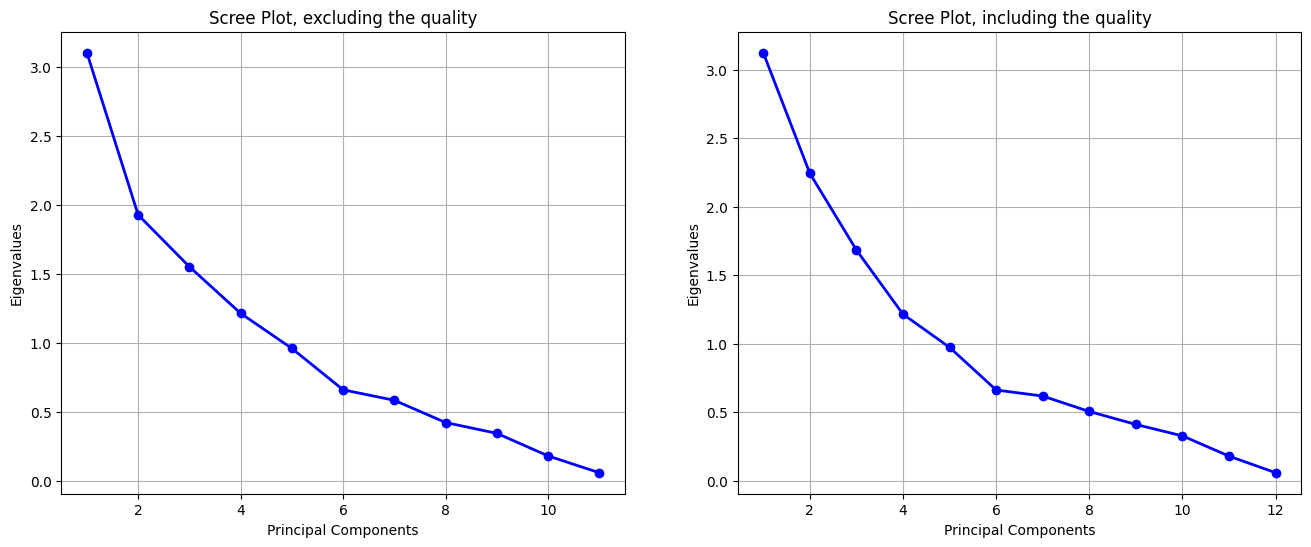

In [84]:
# Make scree plot
#plt.figure(figsize=(8, 6))
f, axs = plt.subplots(1, 2, figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'bo-', linewidth=2,)

plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot, excluding the quality')
plt.grid(True)
#plt.show()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(eigenvalues_2) + 1), eigenvalues_2, 'bo-', linewidth=2)
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot, including the quality')
plt.grid(True)
plt.show()

When excluding the quality we get 4-5 principal components with a high enough relevance explaining the variance.

When including the quality we get 4-5 principal components with a high enough relevance explaining the variance.

While this gives an indication on/visualize the correlation between the portion of the variance and the addition of principle components it is not that intuitive in how that corresponds to the cumulatice variance, which is relevant to achieve statistical relevance.

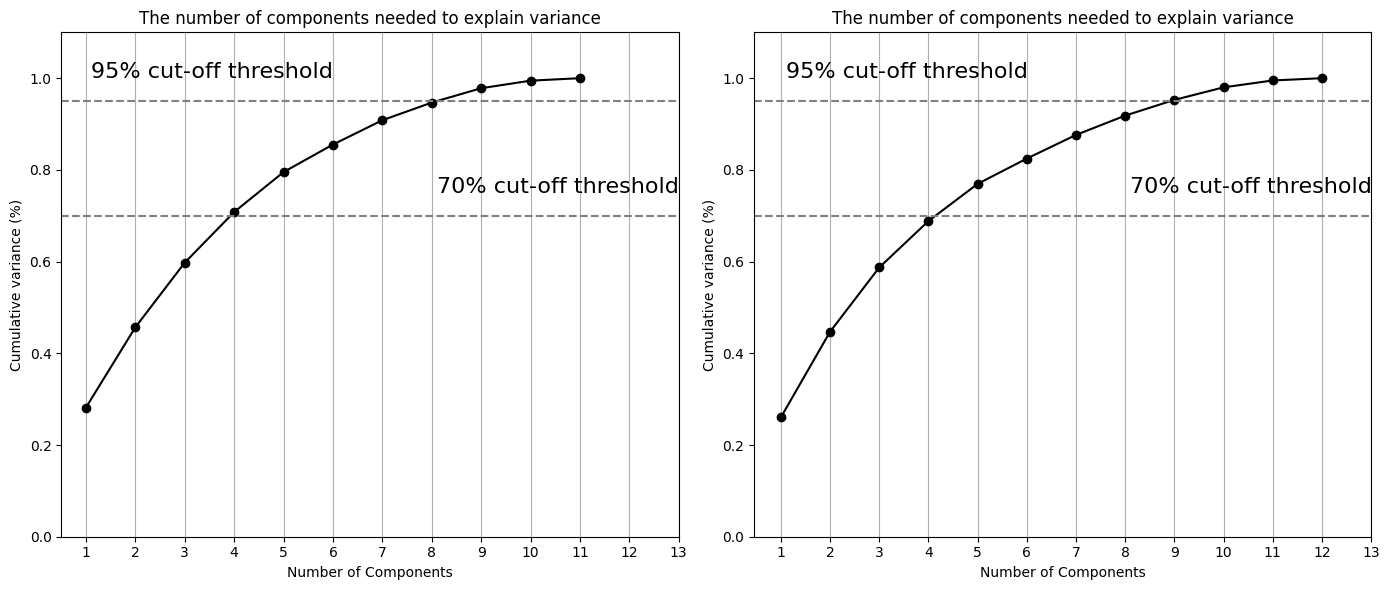

In [85]:
f, axs = plt.subplots(1, 2, figsize=(14, 6))

plt.subplot(1, 2, 1)
xi = np.arange(1, 12, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='-', color='black')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 14, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.7, color='grey', linestyle='--')
plt.text(8.1, 0.75, '70% cut-off threshold', color = 'black', fontsize=16)

plt.axhline(y=0.95, color='grey', linestyle='--')
plt.text(1.1, 1, '95% cut-off threshold', color = 'black', fontsize=16)


plt.tight_layout()
plt.savefig('pcavisualize_1.png', dpi=300)


plt.subplot(1, 2, 2)
xi = np.arange(1, 13, step=1)
yi = np.cumsum(pca_2.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='-', color='black')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 14, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.7, color='grey', linestyle='--')
plt.text(8.1, 0.75, '70% cut-off threshold', color = 'black', fontsize=16)

plt.axhline(y=0.95, color='grey', linestyle='--')
plt.text(1.1, 1, '95% cut-off threshold', color = 'black', fontsize=16)

plt.tight_layout()
plt.savefig('pcavisualize_1.png', dpi=300)

for ax in axs:
  ax.grid(axis='x')
plt.show()


To get a statistically relevant model(95% variance explained) it could be argued that 8-9 components are needed. Using the 4 - 5 principal components indicated in the last step gives an explanatory capability in the area of 70-80%, a few points higher for the model excluding quality than the version including quality.

To further our understanding of the components explanatory capability we visualize how the number of components compare to the full dataset. The components are transposed back to the initial data and ploted to show how well each added component represents the full dataset.


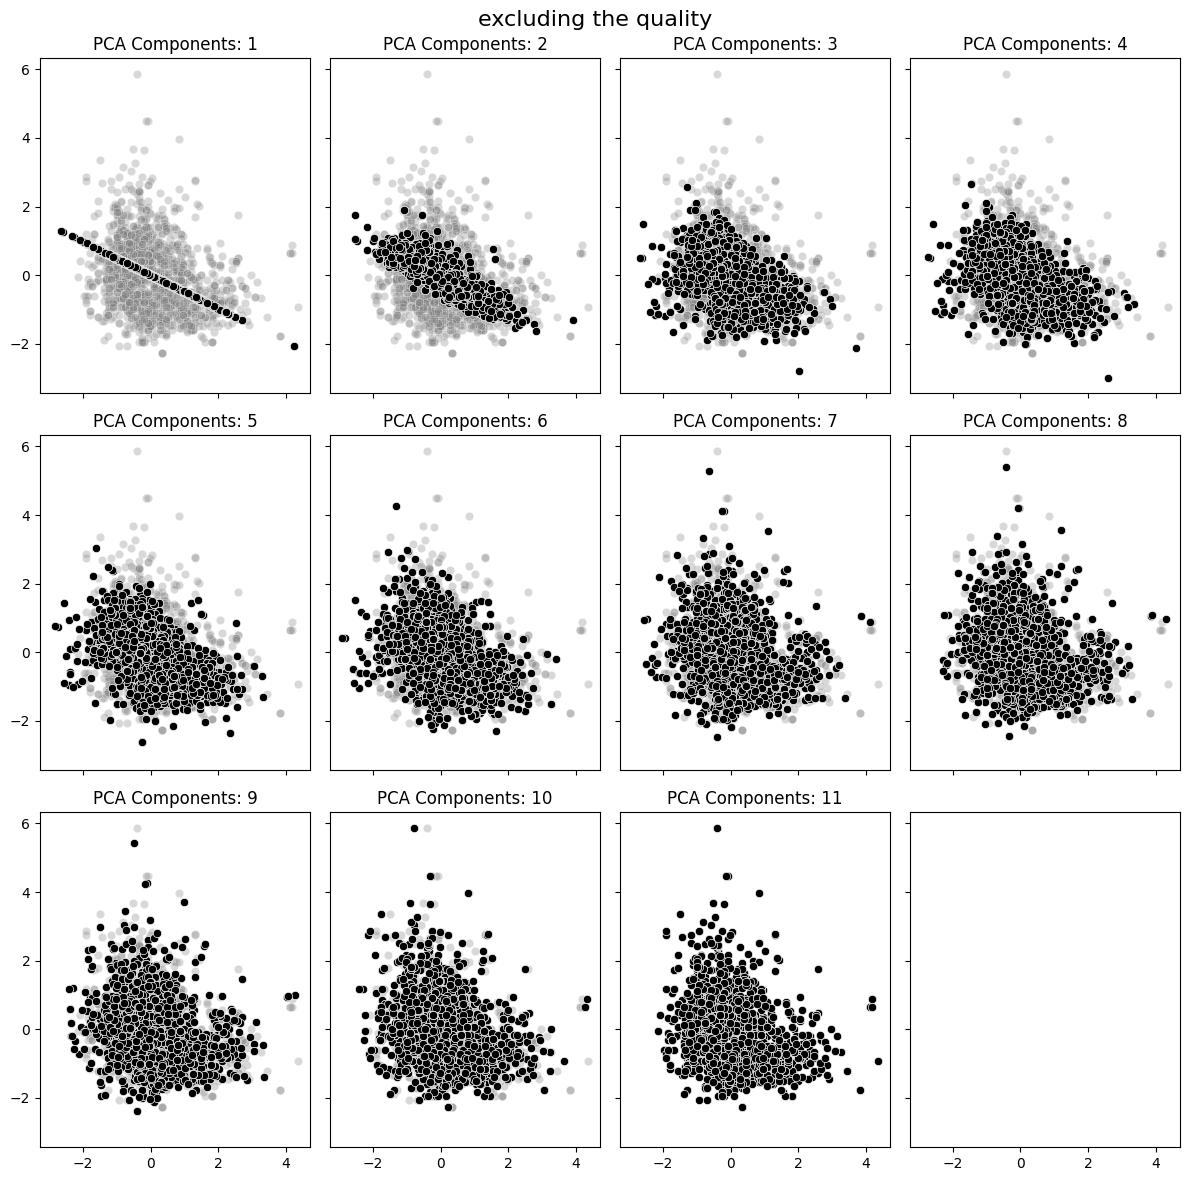

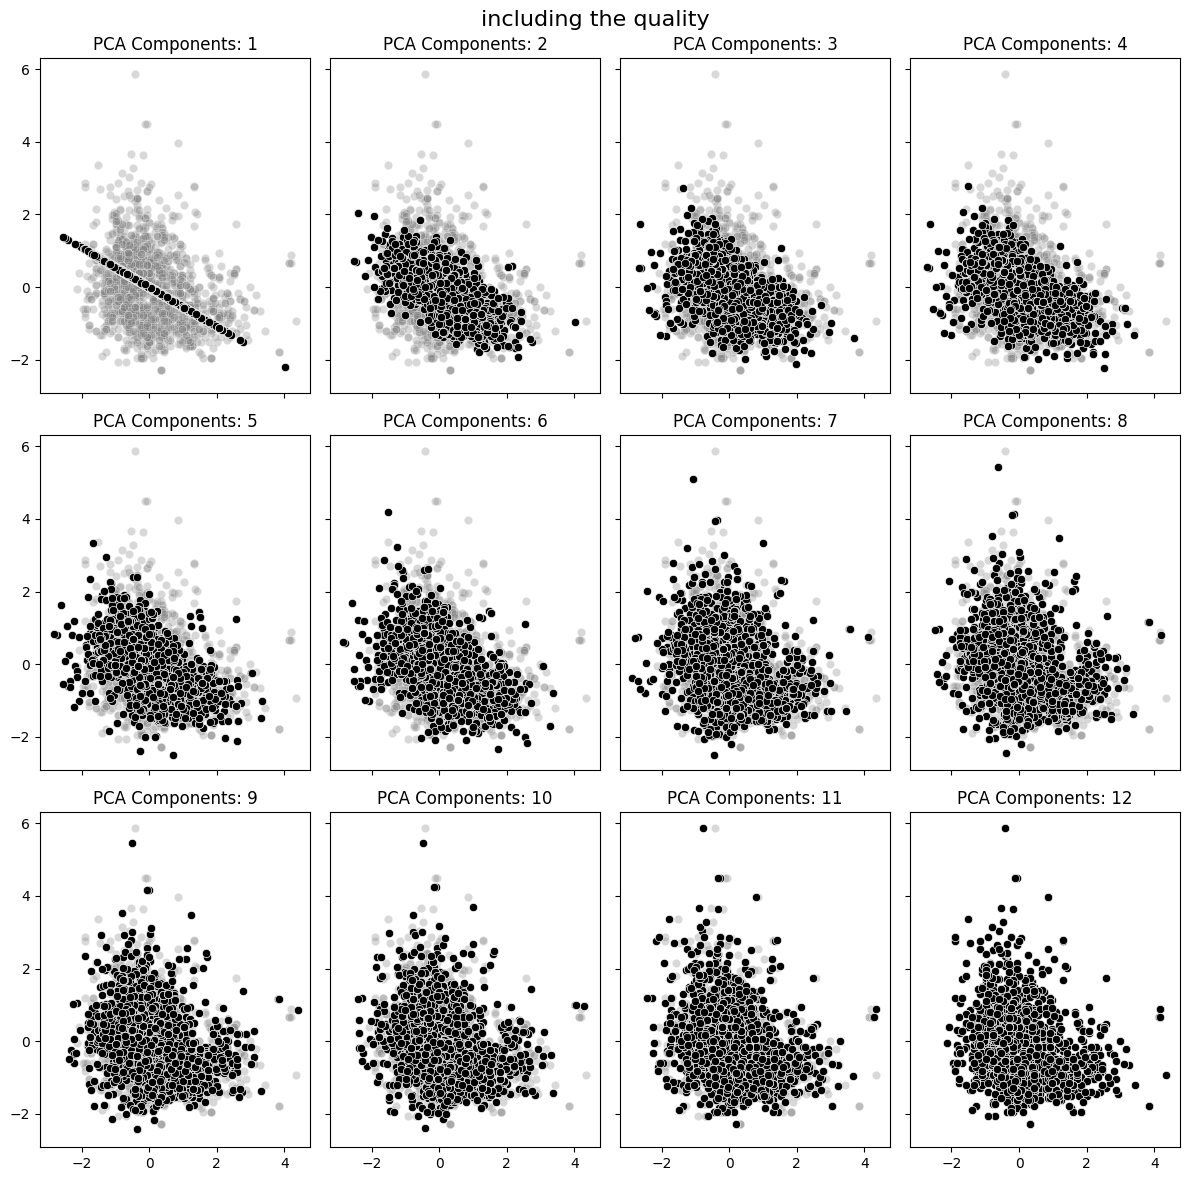

In [86]:
rows = 3
cols = 4
comps = 1

for X_scaled_rerun in [X_scaled, X_scaled_2]:
  fig, axes = plt.subplots(rows,
                          cols,
                          figsize=(12,12),
                          sharex=True,
                          sharey=True)

  for row in range(rows):
      for col in range(cols):
          try:
              X_new = transform_pca(X_scaled_rerun, comps)
              ax = sns.scatterplot(x=X_scaled_rerun[:, 0],
                                  y=X_scaled_rerun[:, 1],
                                  ax=axes[row, col],
                                  color='grey',
                                  alpha=.3)
              ax = sns.scatterplot(x=X_new[:, 0],
                                  y=X_new[:, 1],
                                  ax=axes[row, col],
                                  color='black')
              ax.set_title(f'PCA Components: {comps}');

              comps += 1
          except:
              pass
  fig.suptitle(f'{labelinfo[comps-12]}', fontsize=16)
  plt.tight_layout()
  plt.show()
  comps = 1

This visualization is a great sanitycheck for our current approach to number of principal components to explain the data.

In [87]:
transposed_data_save = transposed_data.copy()
transposed_data_2_save = transposed_data_2.copy()
transposed_data_save_test = transposed_data.copy()

# Conservative approach: keeping 4
transposed_data = transposed_data.drop(columns=transposed_data.columns[4:11])
transposed_data_2 = transposed_data_2.drop(columns=transposed_data_2.columns[4:12])

# inclusive approach: keeping 6
transposed_data_inc = transposed_data_save.drop(columns=transposed_data_save.columns[5:11])
transposed_data_2_inc = transposed_data_2_save.drop(columns=transposed_data_2_save.columns[5:12])

# sum square each observation from PC1 to PC5
transposed_data['sum_of_squares'] = transposed_data.apply(lambda x: sum(x ** 2), axis=1)
transposed_data_2['sum_of_squares'] = transposed_data_2.apply(lambda x: sum(x ** 2), axis=1)
transposed_data_inc['sum_of_squares'] = transposed_data_inc.apply(lambda x: sum(x ** 2), axis=1)
transposed_data_2_inc['sum_of_squares'] = transposed_data_2_inc.apply(lambda x: sum(x ** 2), axis=1)

In [88]:
display_side_by_side([transposed_data, transposed_data_2], ["excluding the quality", "including the quality"])

,0,1,2,3,sum_of_squares
fixed acidity,0.489314,-0.110503,-0.123302,-0.229617,0.319567
volatile acidity,-0.238584,0.274930,-0.449963,0.078960,0.341210
citric acid,0.463632,-0.151791,0.238247,-0.079418,0.301064
residual sugar,0.146107,0.272080,0.101283,-0.372793,0.244608
chlorides,0.212247,0.148052,-0.092614,0.666195,0.519361
free sulfur dioxide,-0.036158,0.513567,0.428793,-0.043538,0.450817
total sulfur dioxide,0.023575,0.569487,0.322415,-0.034577,0.430018
density,0.395353,0.233575,-0.338871,-0.174500,0.356145
pH,-0.438520,0.006711,0.057697,-0.003788,0.195688
sulphates,0.242921,-0.037554,0.279786,0.550872,0.442162


In [89]:
display_side_by_side([transposed_data_inc, transposed_data_2_inc], ["excluding the quality", "including the quality"])

,0,1,2,3,4,sum_of_squares
fixed acidity,0.489314,-0.110503,-0.123302,-0.229617,-0.082614,0.326392
volatile acidity,-0.238584,0.274930,-0.449963,0.078960,0.218735,0.389055
citric acid,0.463632,-0.151791,0.238247,-0.079418,-0.058573,0.304495
residual sugar,0.146107,0.272080,0.101283,-0.372793,0.732144,0.780643
chlorides,0.212247,0.148052,-0.092614,0.666195,0.246501,0.580123
free sulfur dioxide,-0.036158,0.513567,0.428793,-0.043538,-0.159152,0.476146
total sulfur dioxide,0.023575,0.569487,0.322415,-0.034577,-0.222465,0.479508
density,0.395353,0.233575,-0.338871,-0.174500,0.157077,0.380819
pH,-0.438520,0.006711,0.057697,-0.003788,0.267530,0.267260
sulphates,0.242921,-0.037554,0.279786,0.550872,0.225962,0.493221


## Conclusion
As neither dataset can be split into 3 or less principal components while providing a significant explanation of variance, PCA might not be the best fit for evaluating the data if not used to speed up a secondary analysis process such as ML.